# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

# loading Dataset

In [3]:
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# shape of the dataset
print(f'Rows: {df.shape[0]} Columns: {df.shape[1]}')

Rows: 200 Columns: 5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# looking for duplicates
df.duplicated().sum()

0

In [8]:
# checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
# renaming columns for easier access
df.rename(columns = {"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Score"}, inplace = True)

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Score'], dtype='object')

# EDA

In [14]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

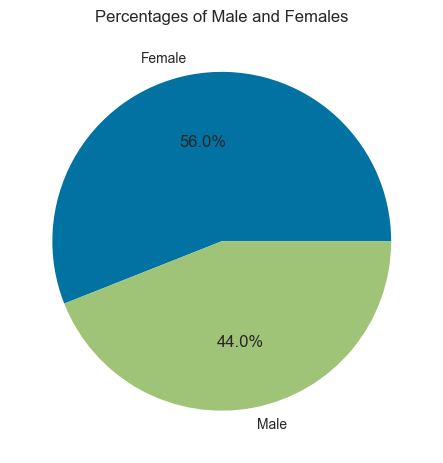

In [15]:
# Male to Female ratio
plt.pie(df.Gender.value_counts(), labels = ['Female', 'Male'], autopct ="%.01f%%")
plt.title('Percentages of Male and Females' );

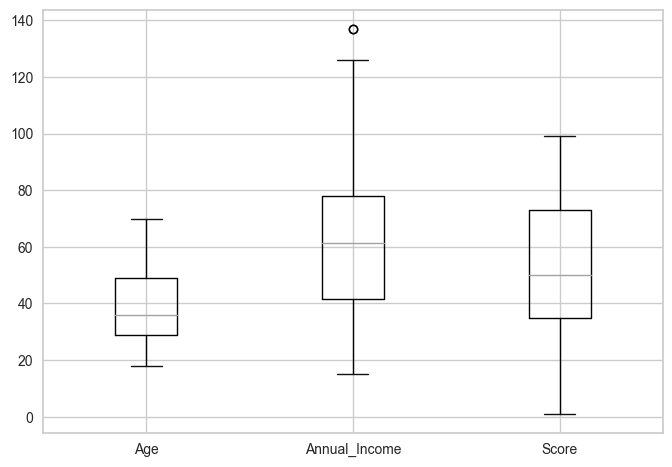

In [17]:
#outliner detection using boxplot
df.iloc[:,1:].boxplot();

Text(0.5, 0, 'Income')

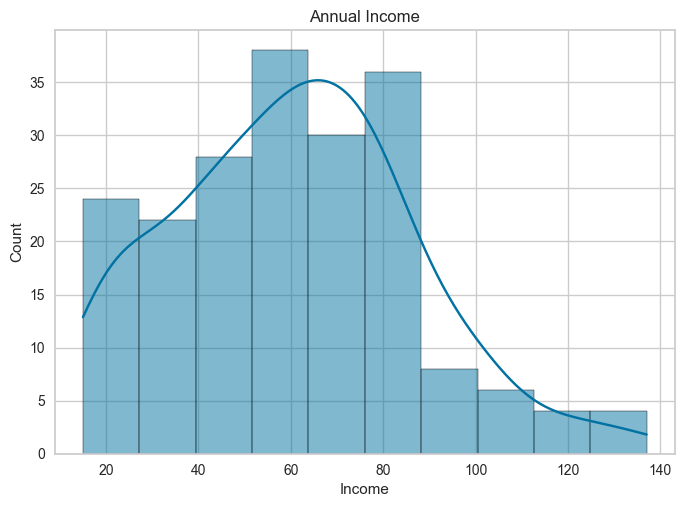

In [18]:
sns.histplot(df.Annual_Income, kde = True)
plt.title("Annual Income")
plt.xlabel("Income")

Text(0.5, 0, 'Age')

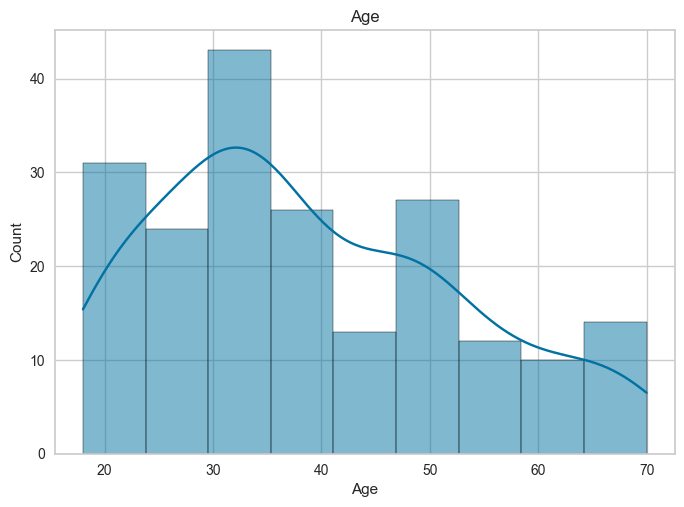

In [19]:
sns.histplot(df.Age, kde = True)
plt.title("Age")
plt.xlabel("Age")

Text(0.5, 0, 'Score')

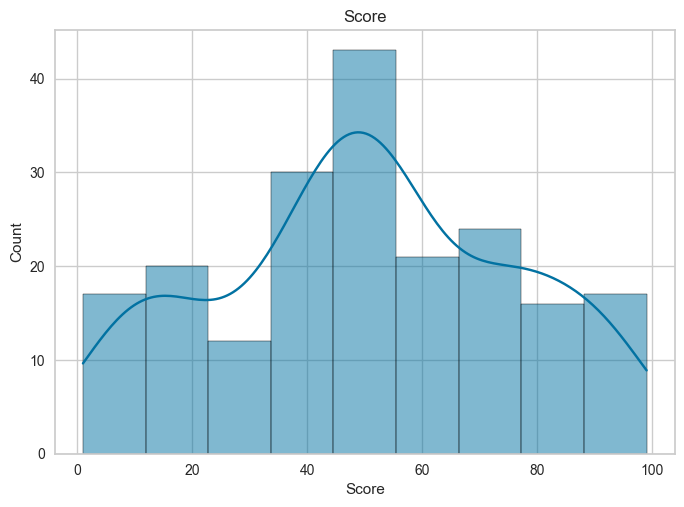

In [21]:

sns.histplot(df.Score, kde = True)
plt.title("Score")
plt.xlabel("Score")

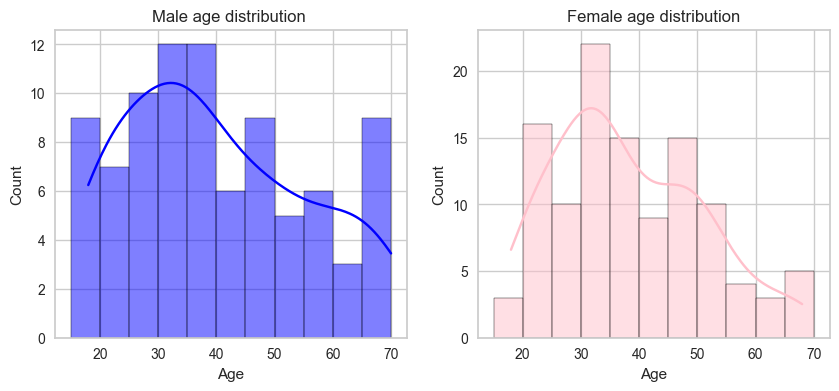

In [29]:
# Distribution of age with respect to gender
male = df[df.Gender == "Male"]["Age"]
female = df[df.Gender != "Male"]['Age']

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color='blue', bins = range(15,75,5), kde = True)
plt.title("Male age distribution ")

plt.subplot(1,2,2)
sns.histplot(female, color = 'pink', bins = range(15,75,5), kde = True)
plt.title("Female age distribution");


plt.show()

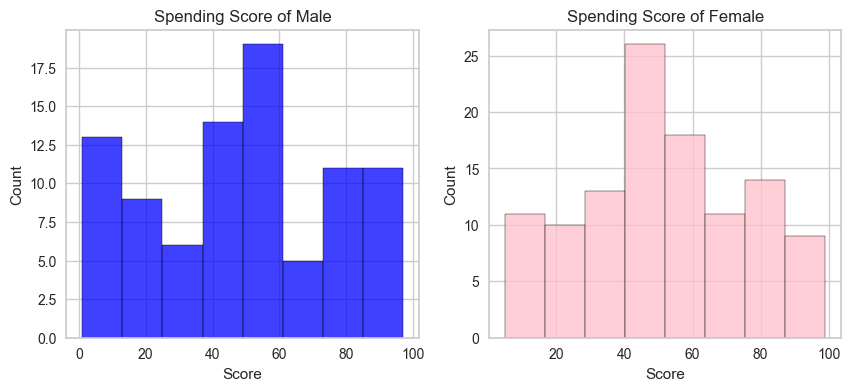

In [24]:
score_male = df[df.Gender == "Male"]["Score"]
score_female = df[df.Gender != "Male"]["Score"]

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(score_male, color = "blue")
plt.title("Spending Score of Male")

plt.subplot(1,2,2)
sns.histplot(score_female, color = 'pink')
plt.title("Spending Score of Female")
plt.show()

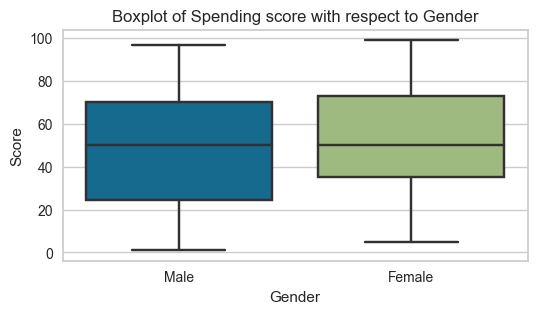

In [25]:
plt.figure(figsize = (6,3))

sns.boxplot(x = df.Gender, y = df.Score)
plt.title('Boxplot of Spending score with respect to Gender')
plt.show()

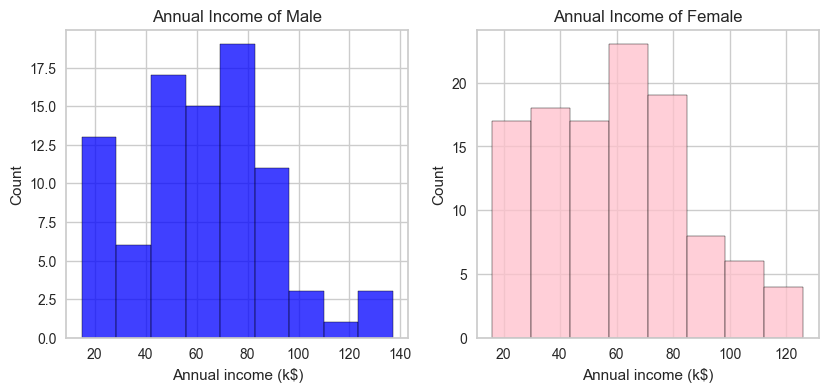

In [28]:
income_male = df[df.Gender == "Male"]["Annual_Income"]
income_female = df[df.Gender != "Male"]["Annual_Income"]

plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.histplot(income_male, color = 'blue')
plt.title("Annual Income of Male")
plt.xlabel("Annual income (k$)")

plt.subplot(1,3,2)
sns.histplot(income_female, color = 'pink')
plt.title("Annual Income of Female")
plt.xlabel("Annual income (k$)")

plt.show()

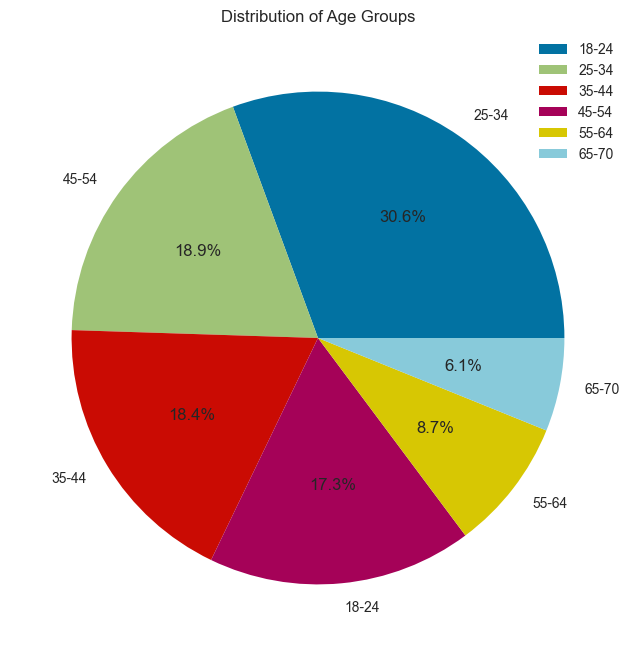

In [30]:
# Spending Score by age group

df['Age_Group'] = pd.cut(df.Age, bins = [18, 25, 35, 45, 55, 65, 70], labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])

plt.figure(figsize = (8, 8))
plt.pie(df.Age_Group.value_counts(), labels = df.Age_Group.value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

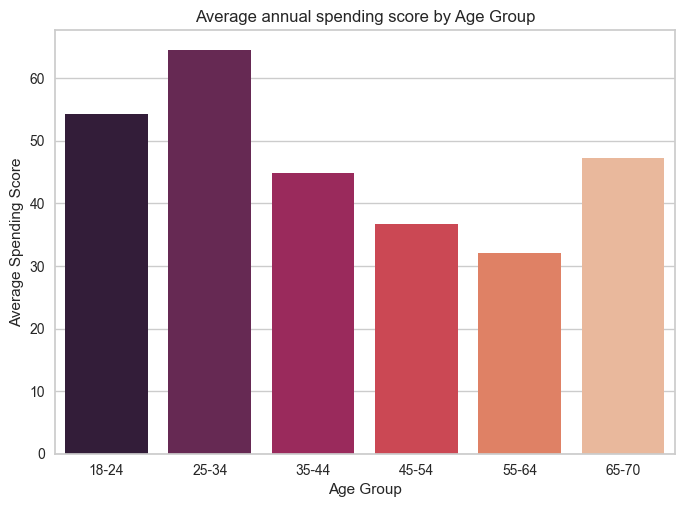

In [32]:
mean_score = df.groupby('Age_Group')['Score'].mean()

sns.barplot(x = mean_score.index, y = mean_score.values, palette = 'rocket')
plt.title("Average annual spending score by Age Group")
plt.ylabel("Average Spending Score")
plt.xlabel("Age Group")
plt.show()

In [33]:
df.drop("Age_Group", axis = 1, inplace = True)

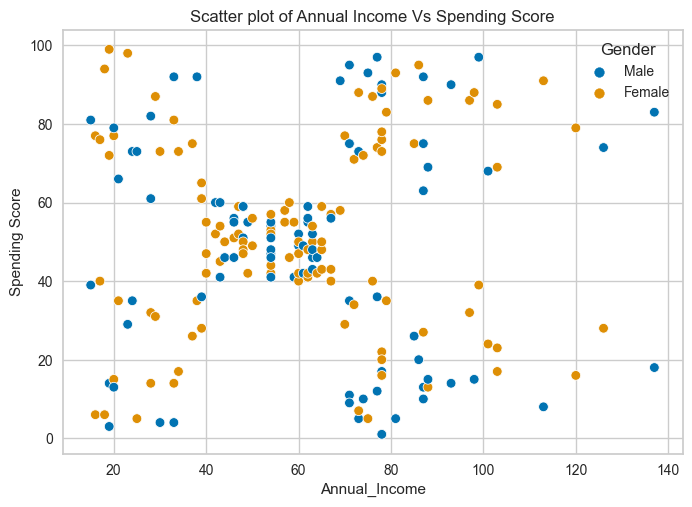

In [36]:
sns.scatterplot(x = df.Annual_Income, y = df.Score, hue = df.Gender, palette = 'colorblind')
plt.title("Scatter plot of Annual Income Vs Spending Score")
plt.ylabel("Spending Score")
plt.show()

# Data preprocessing

In [37]:
X  = df.copy()

In [39]:
# encoding Geenc = LabelEncoder()
enc = LabelEncoder()
X['Gender'] = enc.fit_transform(X['Gender'])
X.drop("CustomerID", axis = 1, inplace = True)
X.head()


,Gender,Age,Annual_Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Clustering Algorithm (K-Means)

In [41]:
# applying KMeans clustering
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42,n_init=10)
    kmeans.fit(df[['Age', 'Annual_Income', 'Score']])
    wcss.append(kmeans.inertia_)

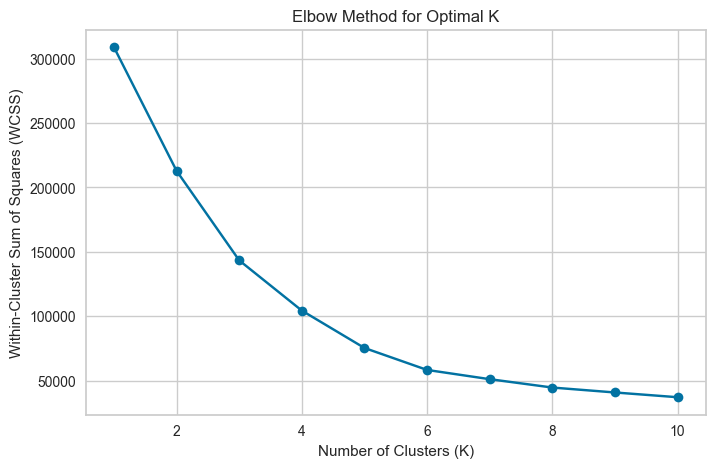

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [43]:
chosen_k = 5
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', random_state=42,n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df[['Age', 'Annual_Income', 'Score']])

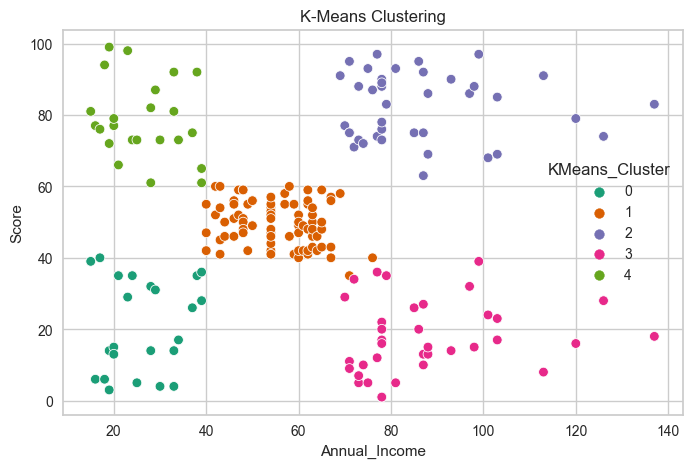

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual_Income', y='Score', hue='KMeans_Cluster', palette='Dark2')
plt.title('K-Means Clustering')
plt.show()
